#1

In [136]:
#2
#a)

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder 

data = pd.read_csv("zomato.csv")

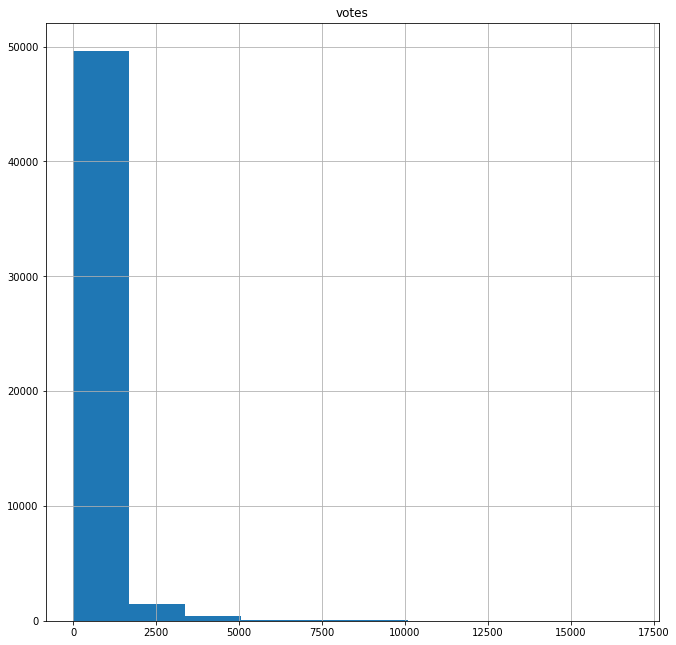

In [137]:
#b)
import matplotlib.pyplot as plt
#I don't understand why the plots are printing on top of each other
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")].index.values].hist(figsize=[11,11])

#The attributes that tell us no information are the following:
data = data.drop(columns=['url','address','phone','name', 'location'])

In [90]:
#c)

duplicates = sum(data.duplicated())
print("# of Duplicate restuarants:", duplicates)
if duplicates > 0:
    data = data.drop_duplicates()

# of Duplicate restuarants: 0


In [122]:
#d)

data.rate = data.rate.astype(str)
data.rate = data.rate.str.rstrip('/5')
data.rate = pd.to_numeric(data.rate, errors='coerce')
data.dropna(inplace=True, subset=['rate'])
data.rate = data.rate.astype(float)
data.loc[data['rate'].idxmax()]

online_order                                                                 Yes
book_table                                                                   Yes
rate                                                                         4.9
votes                                                                      16345
rest_type                                                           Microbrewery
dish_liked                     Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...
cuisines                       Continental, North Indian, Italian, South Indi...
approx_cost(for two people)                                                1,600
reviews_list                   [('Rated 5.0', 'RATED\n  I have been to this p...
menu_item                                                                     []
listed_in(type)                                                         Delivery
listed_in(city)                                                        Bellandur
Name: 3921, dtype: object

#3
a)  This is a supervised task because I am guiding the algorithm as the data has labels.
    This task is a regression problem because it's forecasting a single dependent variable based on other explanatory variables

b)  I will use LinearRegression from sklearn because it does multiple regression very easily and efficiently.
c)  I will use the R-squared metric and mean squared error because they will tell how well the model fits the data.
d)  To avoid overfitting I will use cross validation.

In [143]:
#e and f)

data.dropna(inplace=True, subset=['rate', 'approx_cost(for two people)', 'cuisines', 'rest_type', 'listed_in(city)'])
y = data[['approx_cost(for two people)']].values
X = data[['rate', 'cuisines', 'rest_type', 'listed_in(city)']]
le = LabelEncoder()
y = le.fit_transform(y)
X = X.apply(LabelEncoder().fit_transform)
reg = LinearRegression().fit(X, y)
print("R-squared scores:", cross_val_score(reg, X, y, cv=10))
print("Negative Mean Squared Errors:", cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error'))

C:\Users\james\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03768535256677685
R-squared scores: [0.0478026  0.029215   0.00514161 0.03641727 0.00534451 0.00935104
 0.02689302 0.02570587 0.03512103 0.04047586]
Negative Mean Squared Errors: [-257.94305842 -304.83674263 -357.45013934 -303.49622003 -252.46020721
 -277.6184537  -315.82759535 -345.51420753 -336.24908721 -321.4839948 ]
